# Load Mass Spectrum and calculate metrics

In [1]:
import nhsmass.draw as draw
from nhsmass.spectrum import Spectrum

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load and save

Load mass spectrum from csv file. When loading, if the headings of m/z and intensity are not default ("mass", "intensity"), you must specify them by mapper. You also need to specify a separator (default is ","). In order not to load unnecessary data, we will also set the take_only_mz flag True. 

In [2]:
spec = Spectrum.read_csv(filename = "data/sample2.csv",
                            mapper = {'m/z':'mass', "I":'intensity'},
                            take_only_mz = True,
                            sep = ',',
                            )

Now we can plot spectrum

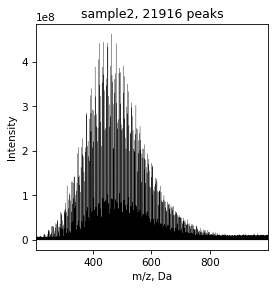

In [3]:
draw.spectrum(spec)

The next step is assignement of brutto formulas for the masses. By default, this process is performed on the following range of elements: 'C' from 4 to 50, 'H' from 4 to 100, 'O' from 0 to 25, 'N' from 0 to 3, 'S' from 0 to 2. The following rules are also followed by default: 0.25<H/C<2.2, O/C < 1, nitogen parity, DBE-O <= 10.

We can specify elements by brutto_dict parameters as bellow. If you want use isotopes use "_" and number, for example "C_13"

rel_error is allowable relative error. By default it is 0.5

In [4]:
spec = spec.assign(brutto_dict={'C':(4,51), 'C_13':(0,3), 'H':(4,101), 'O':(0, 26), 'N':(0,3)}, rel_error=0.5)

Now you can see masses with brutto formulas. But first we can drop unassigned formulas

In [5]:
spec = spec.drop_unassigned()
spec.table

,mass,intensity,assign,C,C_13,H,O,N
0,205.08706,5072918,True,12.0,0.0,14.0,3.0,0.0
1,207.06445,3388781,True,13.0,1.0,9.0,1.0,1.0
2,209.04557,6721187,True,10.0,0.0,10.0,5.0,0.0
3,209.08202,4015701,True,11.0,0.0,14.0,4.0,0.0
4,210.02769,3463522,True,12.0,1.0,6.0,3.0,0.0
...,...,...,...,...,...,...,...,...
6273,991.68139,8570909,True,46.0,2.0,98.0,18.0,2.0
6274,993.51449,10621638,True,41.0,2.0,80.0,23.0,2.0
6275,993.71227,8240803,True,50.0,2.0,100.0,15.0,2.0
6276,995.67950,9630054,True,50.0,2.0,98.0,17.0,0.0


After assignment we can calculate different metrics: H/C, O/C, CRAM, NOSC, AI, DBE and other. We can do it separate by such methods as calc_ai, calc_dbe ... or do all by one command calc_all_metrics

In [6]:
spec = spec.calc_all_metrics()

Now we can see all metrics

In [7]:
spec.table.columns

Index(['mass', 'intensity', 'assign', 'C', 'C_13', 'H', 'O', 'N', 'calc_mass',
       'abs_error', 'rel_error', 'DBE', 'DBE-O', 'DBE_AI', 'CAI', 'AI',
       'DBE-OC', 'H/C', 'O/C', 'class', 'CRAM', 'NOSC', 'brutto', 'Ke', 'KMD'],
      dtype='object')

You can save the data with spectrum and calculated metrics to a csv file at any time by to_csv method

In [8]:
spec.to_csv('temp.csv')

## Draw

Data can be visualized by different methods

Simple Van-Krevelen diagramm. By default CHO formulas is blue, CHON is orange, CHOS is green, CHONS is red. There is no S, so it is only two colors here

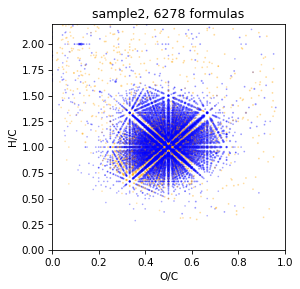

In [9]:
draw.vk(spec)

We can plot it with density axis

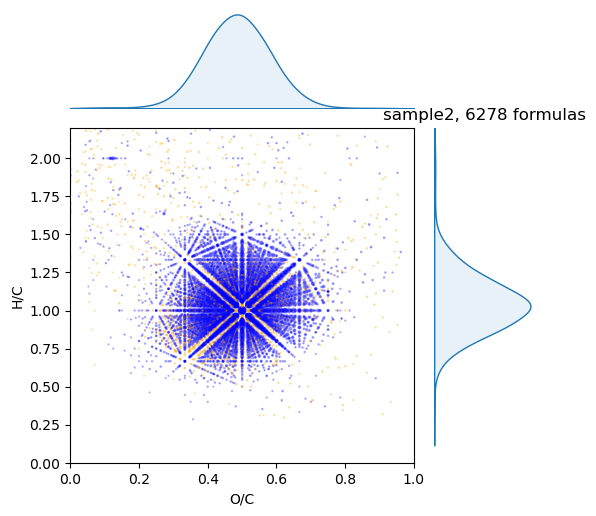

In [10]:
draw.vk(spec, draw.scatter_density)

Or do it with any of metrics in spectrum. For example, NOSC vs DBE-OC

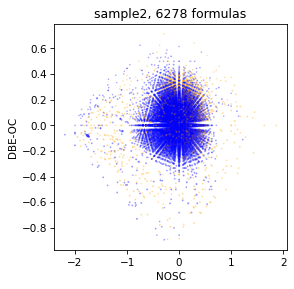

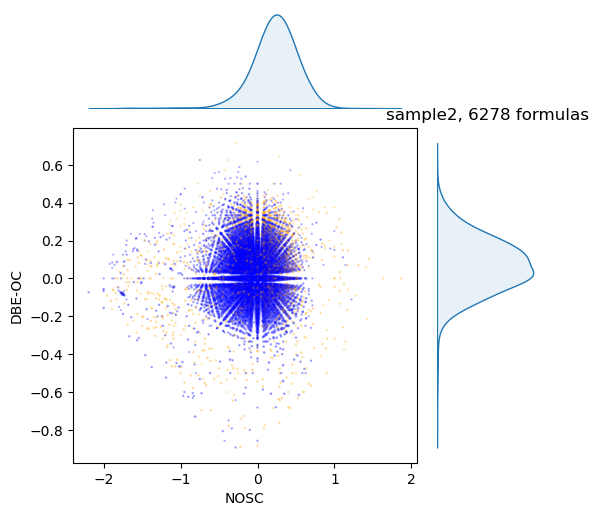

In [11]:
draw.scatter(spec, x='NOSC', y='DBE-OC')
draw.scatter_density(spec, x='NOSC', y='DBE-OC')


We can plot separate density

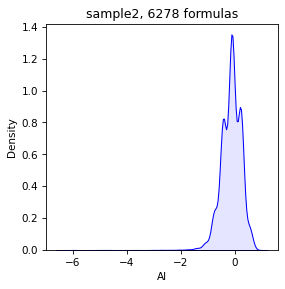

In [12]:
draw.density(spec, 'AI')

Or plot 2D kernel density scatter

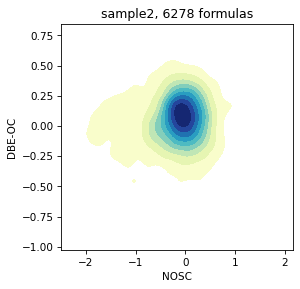

In [13]:
draw.density_2D(spec, x='NOSC', y='DBE-OC')

We can plot Kendric diagramm by command

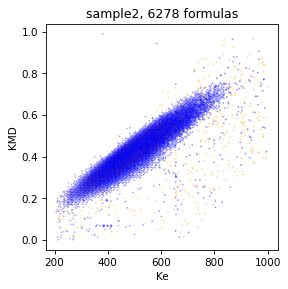

In [14]:
draw.scatter(spec, x='Ke', y='KMD')

## Molecular class

We can get average density of molecular classes of brutto formulas in spectrum

In [15]:
spec.get_mol_class()

,class,density
0,unsat_lowOC,0.553290
1,unsat_highOC,0.404771
2,condensed_lowOC,0.000409
3,condensed_highOC,0.000278
4,aromatic_lowOC,0.010322
5,aromatic_highOC,0.000261
6,aliphatics,0.008320
7,lipids,0.003229
8,N-satureted,0.009970
9,undefinded,0.009150


## Metrics

We can get any metrics that avarage by weight of intensity.

In [16]:
spec.get_mol_metrics()

,metric,value
0,AI,-0.016670
1,C,24.216486
2,CAI,12.502903
3,CRAM,0.798058
4,C_13,0.231241
5,DBE,12.569666
6,DBE-O,0.742390
7,DBE-OC,0.027562
8,DBE_AI,0.624843
9,H,25.873668


In [17]:
spec.get_mol_metrics(metrics=['AI', 'DBE', 'NOSC', 'H/C', 'O/C'])

,metric,value
0,AI,-0.016670
1,DBE,12.569666
2,H/C,1.057624
3,NOSC,-0.064638
4,O/C,0.489112


We can avarage the same by mean or other function(max, min, std, median)

In [18]:
spec.get_mol_metrics(metrics=['AI', 'DBE', 'NOSC', 'H/C', 'O/C'], func='mean')

,metric,value
0,AI,-0.099484
1,DBE,12.824626
2,H/C,1.088260
3,NOSC,-0.117060
4,O/C,0.462034


Also we can split VanKrevelen diagramm to squares and calculate density in each squares

,value,square
0,0.000059,1
1,0.001766,2
2,0.002253,3
3,0.003180,4
4,0.003691,5
5,0.001909,6
6,0.207173,7
7,0.257413,8
8,0.019422,9
9,0.002741,10


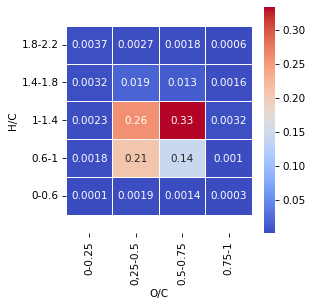

In [19]:
spec.get_squares_vk(draw=True)

It may also be useful to calculate the dependence od DBE vs nO. By fit the slope we can determinen state of sample

(0.5649594882493085, 6.118940572968191)

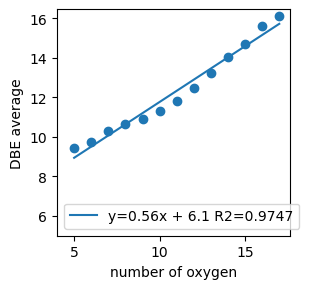

In [20]:
spec.get_dbe_vs_o(draw=True, olim=(5, 18))

Using the obtained metrics, it is possible to classify samples by origin or property, train different models.